In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import itertools
import statsmodels.api as sm

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
path = 'datasets/'
cumtd_data = '00CUMTD_Route_Ridership_By_Day_September_2022_2023.csv'
data_file = path + cumtd_data # get the directory of the file

In [26]:
dataframe = pd.read_csv(data_file) # read in the csv file
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31T19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31T19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31T19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31T19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31T19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29T19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29T19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29T19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29T19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [27]:
colums_to_traverse = dataframe.keys()[2:] # these are the columns we will be traversing for out data analysis
colums_to_traverse

Index(['In (Sum)', 'Out (Sum)', 'Load (Avg.)', 'Load max', '#APC-Trips'], dtype='object')

In [28]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31 19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29 19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29 19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29 19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29 19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [29]:
bus_lines = dataframe['Line'].unique() # we want to see how many unique bus lines there are
print(f'CUMTD bus lines: {bus_lines}')

CUMTD bus lines: ['1 YELLOW ALT' '10W GOLD ALT' '1N YELLOW ALT' '1N YELLOW ALT PM'
 '1S YELLOW ALT' '3S LAVENDER ALT' '5E GREEN EXPRESS 1 ALT'
 '5E GREEN EXPRESS ALT' '5W GREEN ALT 2' '5W GREEN EXPRESS 2'
 '7E GREY ALT' '7W GREY ALT' 'BLUE' 'BRONZE' 'BRONZE ALT' 'BROWN'
 'BROWN ALT' 'BROWN ALT PM' 'BROWN ALT1' 'GOLD' 'GOLD ALT' 'GOLDHOPPER'
 'GREEN' 'GREEN ALT' 'GREEN EVENING' 'GREEN EXPRESS' 'GREEN EXPRESS ALT'
 'GREEN LATE NIGHT' 'GREENHOPPER' 'GREENHOPPER EVENING' 'GREY' 'GREY ALT'
 'GREY EVENING' 'ILLINI' 'ILLINI EVENING' 'LAVENDER' 'LAVENDER ALT'
 'LIME EVENING' 'LINK' 'NAVY' 'ORANGE' 'ORANGE ALT' 'ORANGEHOPPER' 'PINK'
 'PINK ALT' 'RAVEN' 'RED' 'RUBY' 'RUBY EVENING' 'SILVER' 'SILVER EVENING'
 'SILVER LATE NIGHT' 'TEAL' 'TEAL EVENING' 'TEAL LATE NIGHT' 'YELLOW'
 'YELLOW EVENING' 'YELLOW LATE NIGHT' 'YELLOWHOPPER'
 'GREEN EVENING SATURDAY' 'GREEN LATE NIGHT SATURDAY' 'GREEN SATURDAY'
 'GREENHOPPER EVENING SATURDAY' 'GREY EVENING SATURDAY' 'GREY SATURDAY'
 'ILLINI EVENING SATURDAY' '

In [30]:
yellow_bus_lines = [line for line in bus_lines if "yellow" in line.lower()]
yellow_bus_lines

['1 YELLOW ALT',
 '1N YELLOW ALT',
 '1N YELLOW ALT PM',
 '1S YELLOW ALT',
 'YELLOW',
 'YELLOW EVENING',
 'YELLOW LATE NIGHT',
 'YELLOWHOPPER',
 'YELLOW EVENING SATURDAY',
 'YELLOW LATE NIGHT SATURDAY',
 'YELLOW SATURDAY',
 'YELLOW LATE NIGHT SUNDAY',
 'YELLOW SUNDAY']

In [31]:
# Define the list of line names you're interested in
lines_of_interest = yellow_bus_lines

# Filter the dataframe based on the list
filtered_dataframe = dataframe[dataframe['Line'].isin(lines_of_interest)]
filtered_dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
55,2022-08-31 19:00:00-05:00,YELLOW,"2,000","2,000",7.1,74,53
...,...,...,...,...,...,...,...
15755,2023-09-28 19:00:00-05:00,YELLOW LATE NIGHT,84,84,1.4,13,19
15756,2023-09-28 19:00:00-05:00,YELLOWHOPPER,814,814,8.0,59,33
15776,2023-09-29 19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29 19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [32]:
mask = filtered_dataframe['Line'] == 'YELLOW'
yellow = filtered_dataframe[mask]
yellow

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
55,2022-08-31 19:00:00-05:00,YELLOW,"2,000","2,000",7.1,74,53
114,2022-09-01 19:00:00-05:00,YELLOW,"1,987","1,987",8.2,49,53
208,2022-09-05 19:00:00-05:00,YELLOW,"1,915","1,915",7.6,54,53
267,2022-09-06 19:00:00-05:00,YELLOW,"1,877","1,877",6.4,57,51
325,2022-09-07 19:00:00-05:00,YELLOW,"2,025","2,025",6.5,50,58
...,...,...,...,...,...,...,...
15521,2023-09-24 19:00:00-05:00,YELLOW,"1,963","1,963",6.8,57,50
15579,2023-09-25 19:00:00-05:00,YELLOW,"2,094","2,094",6.9,50,55
15637,2023-09-26 19:00:00-05:00,YELLOW,"2,238","2,238",6.7,63,57
15695,2023-09-27 19:00:00-05:00,YELLOW,"2,143","2,143",7.4,58,53


In [33]:
yellow = yellow.set_index('Date')
yellow = yellow.asfreq('D')
yellow.index

DatetimeIndex(['2022-08-31 19:00:00-05:00', '2022-09-01 19:00:00-05:00',
               '2022-09-02 19:00:00-05:00', '2022-09-03 19:00:00-05:00',
               '2022-09-04 19:00:00-05:00', '2022-09-05 19:00:00-05:00',
               '2022-09-06 19:00:00-05:00', '2022-09-07 19:00:00-05:00',
               '2022-09-08 19:00:00-05:00', '2022-09-09 19:00:00-05:00',
               ...
               '2023-09-19 19:00:00-05:00', '2023-09-20 19:00:00-05:00',
               '2023-09-21 19:00:00-05:00', '2023-09-22 19:00:00-05:00',
               '2023-09-23 19:00:00-05:00', '2023-09-24 19:00:00-05:00',
               '2023-09-25 19:00:00-05:00', '2023-09-26 19:00:00-05:00',
               '2023-09-27 19:00:00-05:00', '2023-09-28 19:00:00-05:00'],
              dtype='datetime64[ns, UTC-05:00]', name='Date', length=394, freq='D')

In [34]:
yellow.isnull().sum()

Line           117
In (Sum)       117
Out (Sum)      117
Load (Avg.)    117
Load max       117
#APC-Trips     117
dtype: int64

In [35]:
y_var = 'Load max'

In [36]:
y = yellow[y_var]
y = y.asfreq('D')

In [37]:
print(y.isnull().sum())

117


In [38]:
y = y.fillna(y.mean())

In [39]:
print(y.isnull().sum())

0


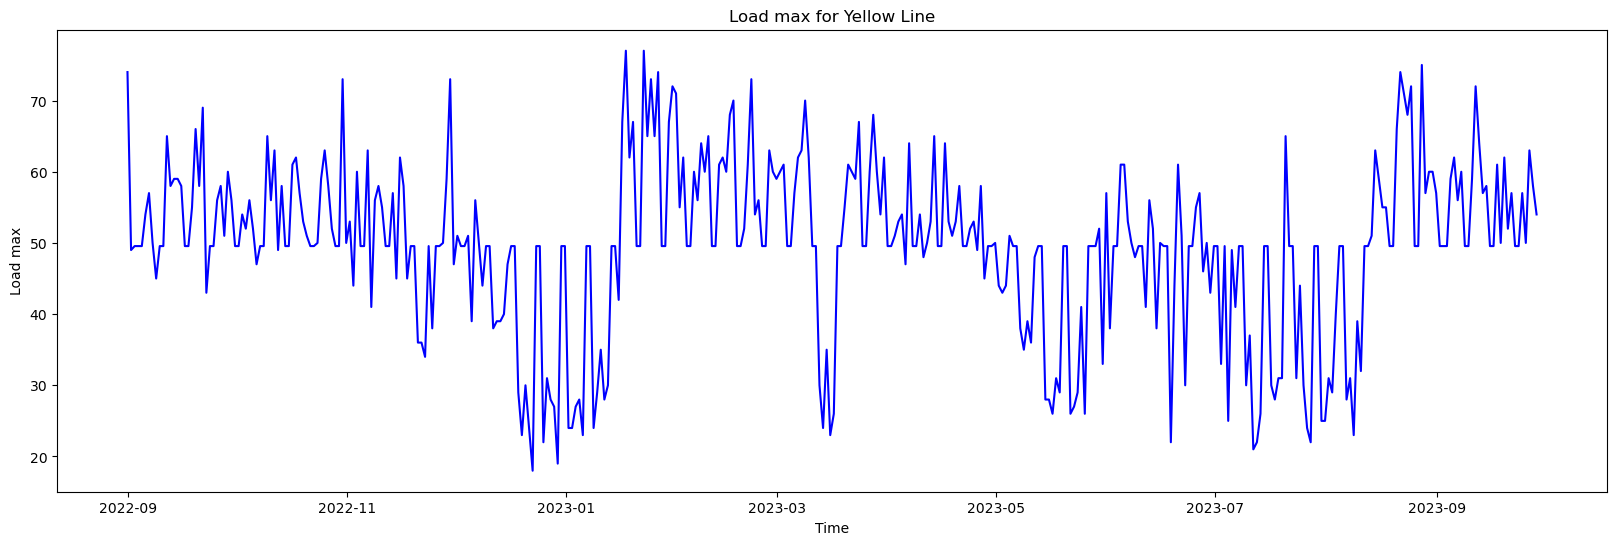

In [40]:
plt.figure(figsize=(20, 6))
plt.plot(y, label='Observed Data', color='blue')
plt.title('Load max for Yellow Line')
plt.xlabel('Time')
plt.ylabel('Load max')
plt.savefig('figures/Louis_yellow.png')

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(y, seasonal='mul', seasonal_periods=160).fit()

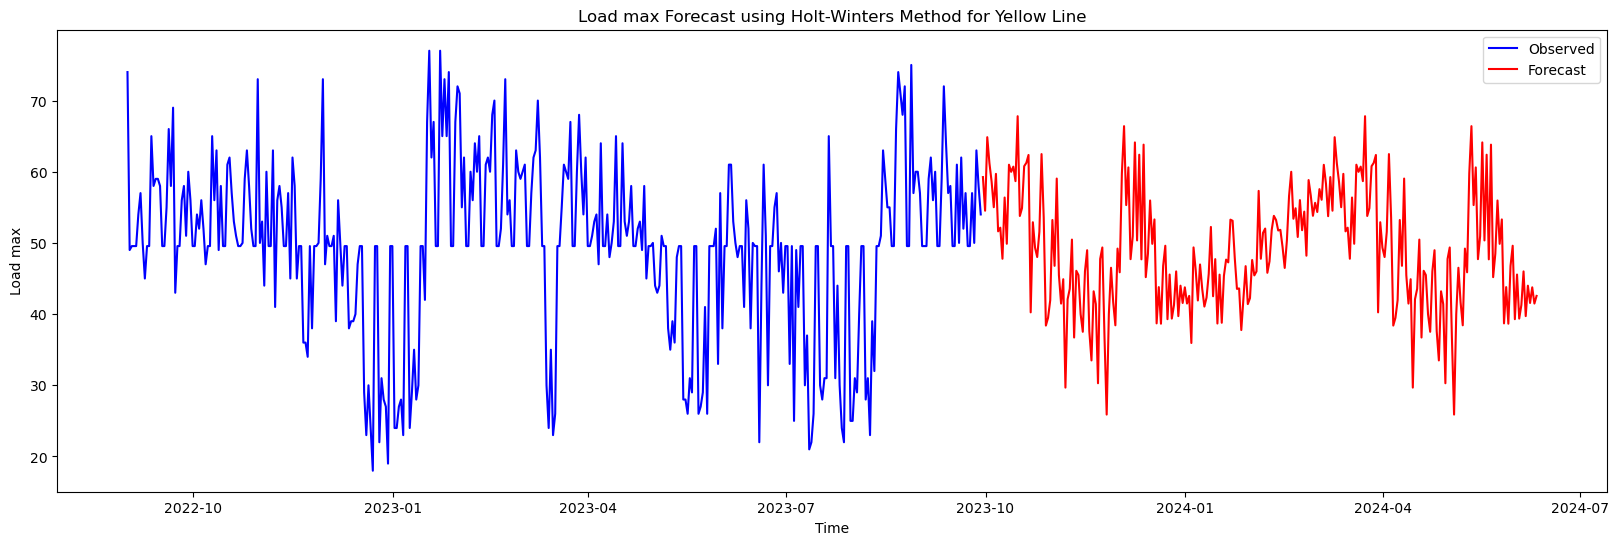

In [42]:
y_forecasted = model.forecast(steps=256)
plt.figure(figsize=(20, 6))
plt.plot(y, label='Observed', color='blue')
plt.plot(y_forecasted, label='Forecast', color='red')
plt.title('Load max Forecast using Holt-Winters Method for Yellow Line')
plt.xlabel('Time')
plt.ylabel('Load max')
plt.legend()
plt.savefig('figures/Louis_yellow-predictions.png')
plt.show()